### Course: (MANB2153-02) Machine Learning for Business Problem
### Task: Machine Learning Project
### Project Title: Predicting Sales for Mega Supermarket Stores using  Machine Learning Algorithms

#### Team members:-
##### Khadijah Binti Yusoff (MAN191051);
##### Siti Nur Nadia Binti Anuar (MAN181068);
##### Muhammad Faiz Bin Sahrani (MAN191022);
##### Punithawathy A/P Thevandran (MAN191032).

In [1]:
import numpy as np #linear algebra
import pandas as pd #for data processing, CSV file
import matplotlib.pyplot as plt #creating plotting area
import seaborn as sns #python data visualization library based on matplotlib
import mpl_toolkits #provides some basic 3D plotting (scatter, surf, line, mesh)
%matplotlib inline

# Data Analysis & Transformation

In [2]:
#This is to allow jupyter to read the data file in CSV format and saving it as a panda dataframe
data=pd.read_csv(r'C:\Users\Faiz Sahrani\Documents\Personal\UTM\Semester_2\MANB2153 - Machine Learning\Project\New folder/MegaData2.csv')

In [3]:
#To get the first n rows
data.head()

,Store_Number,Store_Founded,Store_Type,Store_Size,Store_Location_Type,Item_Number,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Store_Sales_Value
0,STR049,1999,Supermarket,Medium,Tier 1,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,3735.1380
1,STR018,2009,Convenience,Medium,Tier 3,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,443.4228
2,STR049,1999,Supermarket,Medium,Tier 1,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,2097.2700
3,STR010,1998,Grocery Store,Small,Tier 3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,732.3800
4,STR013,1987,Supermarket,High,Tier 3,NCD19,8.93,Low Fat,0.000000,Household,53.8614,994.7052


In [4]:
#The following process is the get to know the dataset.
#To describe the data
print(data.describe())

       Store_Founded  Item_Weight  Item_Visibility     Item_MRP  \
count    8523.000000  7172.000000      8523.000000  8523.000000   
mean     1997.831867    12.735385         0.066487   140.992782   
std         8.371760     4.729304         0.051449    62.275067   
min      1985.000000     3.200000         0.000000    31.290000   
25%      1987.000000     8.626250         0.027393    93.826500   
50%      1999.000000    12.500000         0.054363   143.012800   
75%      2004.000000    16.750000         0.094864   185.643700   
max      2009.000000    21.350000         0.328391   266.888400   

       Store_Sales_Value  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [5]:
#To check the type of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Store_Number           8523 non-null object
Store_Founded          8523 non-null int64
Store_Type             8523 non-null object
Store_Size             8523 non-null object
Store_Location_Type    8523 non-null object
Item_Number            8523 non-null object
Item_Weight            7172 non-null float64
Item_Fat_Content       8523 non-null object
Item_Visibility        8523 non-null float64
Item_Type              8523 non-null object
Item_MRP               8523 non-null float64
Store_Sales_Value      8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [6]:
#To check for missing values in the data
data.isna().sum()

Store_Number              0
Store_Founded             0
Store_Type                0
Store_Size                0
Store_Location_Type       0
Item_Number               0
Item_Weight            1351
Item_Fat_Content          0
Item_Visibility           0
Item_Type                 0
Item_MRP                  0
Store_Sales_Value         0
dtype: int64

In [7]:
#To check the values in Item_Weight column
data['Item_Weight'].interpolate(inplace=True)

In [8]:
#Ensuring that the values has been filled in the data
print(data['Item_Weight'].isna().sum())
data['Item_Weight'].sample(10)

0


5908    18.700
6025     5.655
6602     8.210
5829     6.865
4843    18.350
4833    10.650
5177     3.200
2815    12.650
2063    19.200
854     13.400
Name: Item_Weight, dtype: float64

In [9]:
#To check numbers of stores/ samples
data.count()

Store_Number           8523
Store_Founded          8523
Store_Type             8523
Store_Size             8523
Store_Location_Type    8523
Item_Number            8523
Item_Weight            8523
Item_Fat_Content       8523
Item_Visibility        8523
Item_Type              8523
Item_MRP               8523
Store_Sales_Value      8523
dtype: int64

In [10]:
#To identify the number of stores by store type 
data.Store_Type.value_counts()

Supermarket      5577
Grocery Store    1083
Cold Storage      935
Convenience       928
Name: Store_Type, dtype: int64

In [11]:
#To identify the number of stores in Tier 1, 2, and 3
data.Store_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Store_Location_Type, dtype: int64

In [12]:
#To check the number of stores by items
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
#To identify the number of stores by various outlet size
data.Store_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Store_Size, dtype: int64

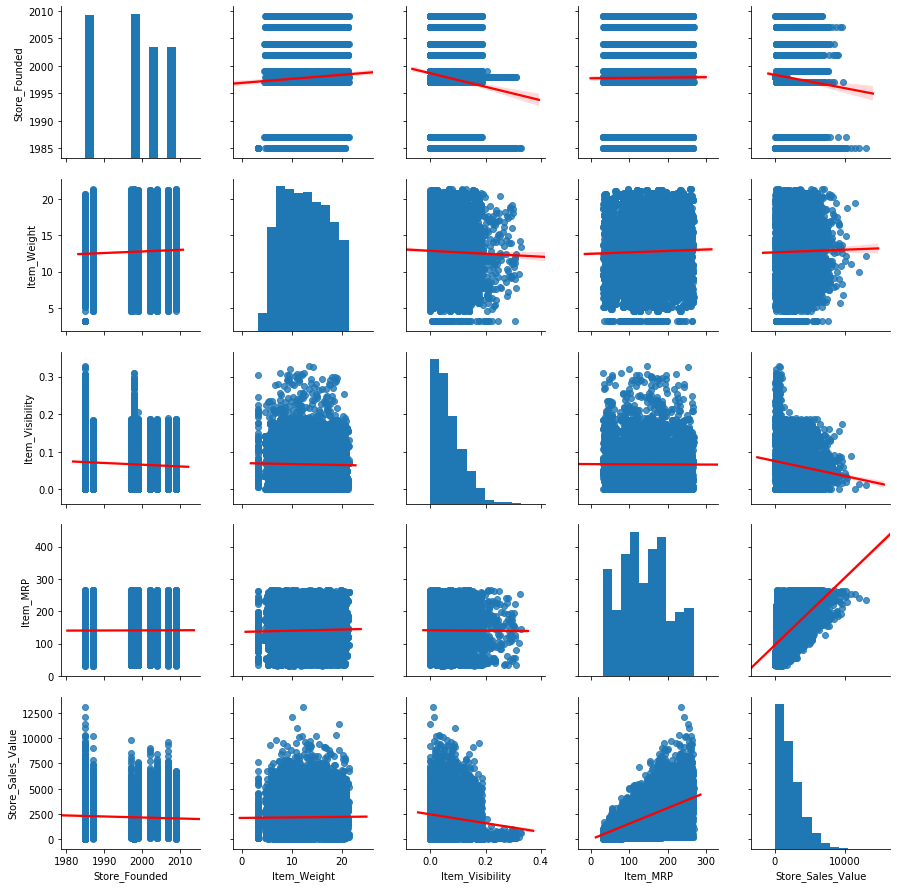

In [14]:
#This is to identify the corelation of various variables
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

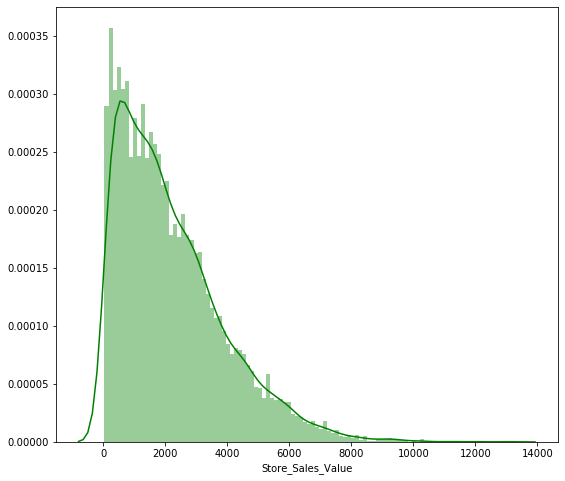

In [15]:
#This is to visualize the distribution of the total store sales value
plt.figure(figsize=(9,8))
sns.distplot(data['Store_Sales_Value'], color='g', bins=100, hist_kws={'alpha':0.4});

In [16]:
#Firstly we will split the data into labels and features.
y=data.Store_Sales_Value
x=data.drop('Store_Sales_Value',axis=1)

In [17]:
#Now, we build distributons for the other columns and see the relationship to store sales value
data_num=data.select_dtypes(include=['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1335C530>,
      dtype=object)

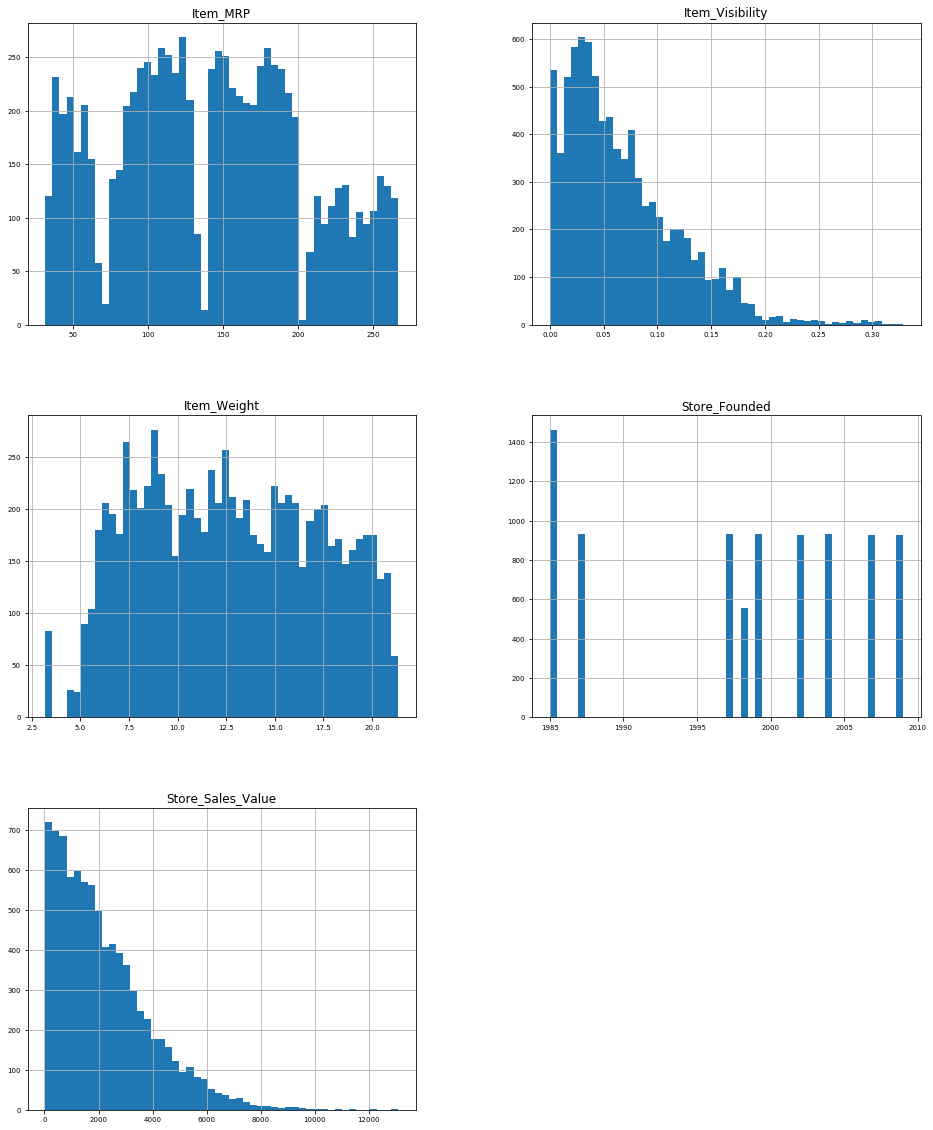

In [18]:
data_num.hist(figsize=(16,20), bins=50, xlabelsize=7, ylabelsize=7)

In [19]:
#Checking correlation of target and features
corr_matrix=data.corr()
corr_matrix['Store_Sales_Value']

Store_Founded       -0.049135
Item_Weight          0.013755
Item_Visibility     -0.131903
Item_MRP             0.567574
Store_Sales_Value    1.000000
Name: Store_Sales_Value, dtype: float64

In [20]:
#Identifing the relationship of Store Sales Value with each columns relation
data.Item_Number.value_counts()

FDG33    10
FDW13    10
DRE49     9
NCQ06     9
NCJ30     9
         ..
FDC23     1
FDY43     1
FDE52     1
FDT35     1
FDO33     1
Name: Item_Number, Length: 1559, dtype: int64

In [21]:
data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
#To process further, we converted the data types in columns into their correct type
data.Item_Number=data.Item_Number.astype('category')
data.Item_Fat_Content=data.Item_Fat_Content.astype('category')
data.Item_Type=data.Item_Type.astype('category')
data.Store_Number=data.Store_Number.astype('category')
data.Store_Founded=data.Store_Founded.astype('int64')
data.Store_Type=data.Store_Type.astype('category')
data.Store_Location_Type=data.Store_Location_Type.astype('category')
data.Store_Size=data.Store_Size.astype('category')

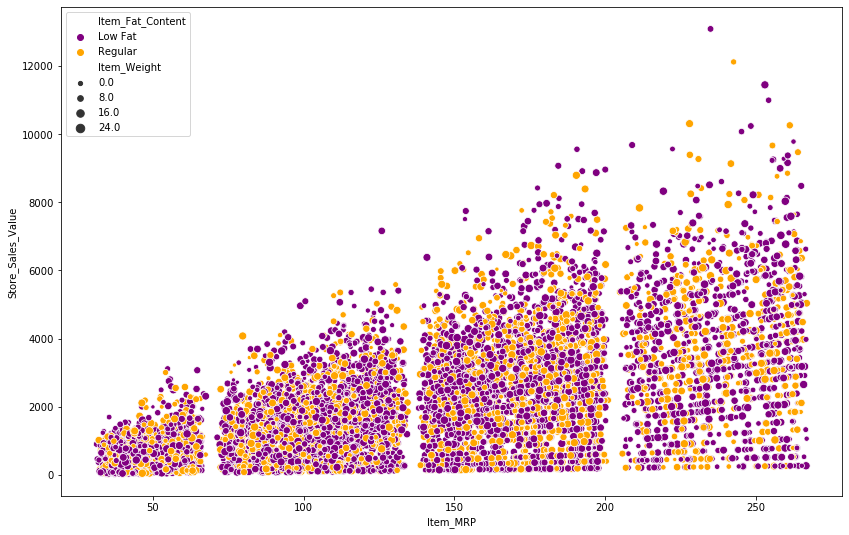

In [23]:
#Now, let us visualize the strong correlation strength of the Store Sales value vs Item MRP
import colorsys
fig,axes=plt.subplots(1,1,figsize=(14,9))
sns.scatterplot(x='Item_MRP',y='Store_Sales_Value', hue='Item_Fat_Content', palette=['purple','orange'],size='Item_Weight', data=data)

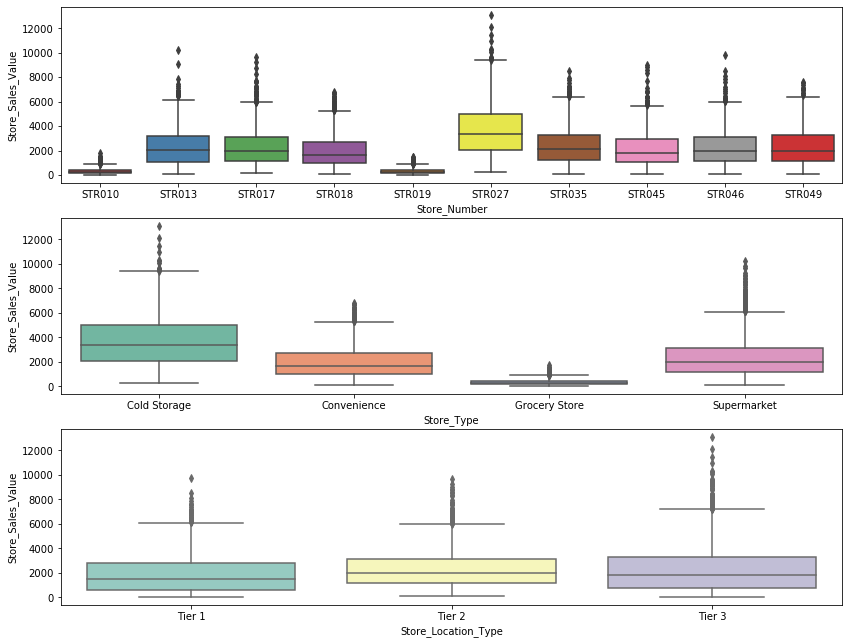

In [24]:
# Exploring other colomns through visualizations (part 1)
fig,axes=plt.subplots(3,1,figsize=(14,11))
sns.boxplot(x='Store_Number', y='Store_Sales_Value',ax=axes[0],data=data, palette="Set1")
sns.boxplot(x='Store_Type', y='Store_Sales_Value', ax=axes[1],data=data,palette="Set2")
sns.boxplot(x='Store_Location_Type', y='Store_Sales_Value', ax=axes[2],data=data,palette="Set3")


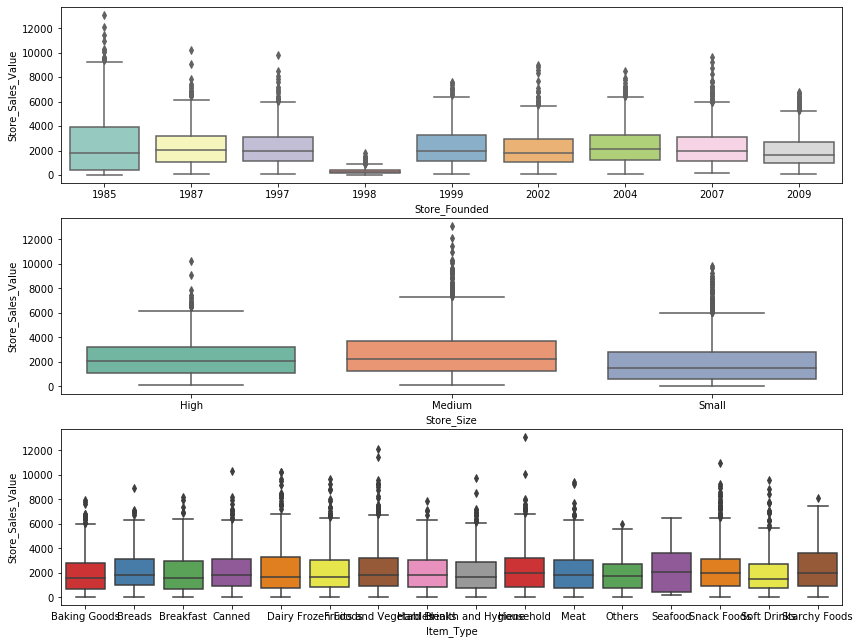

In [25]:
# Exploring other columns through visualizations (part 2)
fig,axes=plt.subplots(3,1,figsize=(14,11))
sns.boxplot(x='Store_Founded', y='Store_Sales_Value',ax=axes[0],data=data, palette="Set3")
sns.boxplot(x='Store_Size', y='Store_Sales_Value', ax=axes[1],data=data, palette="Set2")
sns.boxplot(x='Item_Type', y='Store_Sales_Value', ax=axes[2],data=data, palette="Set1")


In [26]:
#The selection of data that we will feed into modelling
attributes=['Store_Sales_Value', 'Store_Number','Store_Type', 'Store_Location_Type', 'Store_Founded', 'Store_Size', 'Item_Type', 'Item_MRP']


In [27]:
data=data[attributes]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Store_Sales_Value      8523 non-null float64
Store_Number           8523 non-null category
Store_Type             8523 non-null category
Store_Location_Type    8523 non-null category
Store_Founded          8523 non-null int64
Store_Size             8523 non-null category
Item_Type              8523 non-null category
Item_MRP               8523 non-null float64
dtypes: category(5), float64(2), int64(1)
memory usage: 242.3 KB


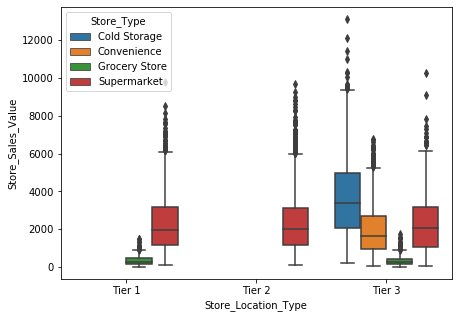

In [29]:
fig,axes=plt.subplots(1,1,figsize=(7,5))
sns.boxplot(y='Store_Sales_Value', hue='Store_Type', x='Store_Location_Type', data=data)

In [30]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['Store'] = label.fit_transform(data['Store_Number'])
variable = ['Store_Type', 'Store_Location_Type', 'Store_Size', 'Item_Type', 'Store']

for i in variable:
  data[i] = label.fit_transform(data[i])

data.head(5)

,Store_Sales_Value,Store_Number,Store_Type,Store_Location_Type,Store_Founded,Store_Size,Item_Type,Item_MRP,Store
0,3735.1380,STR049,3,0,1999,1,4,249.8092,9
1,443.4228,STR018,1,2,2009,1,14,48.2692,3
2,2097.2700,STR049,3,0,1999,1,10,141.6180,9
3,732.3800,STR010,2,2,1998,2,6,182.0950,0
4,994.7052,STR013,3,2,1987,0,9,53.8614,1


In [31]:
data = pd.get_dummies(data, columns=['Store_Type', 'Store_Location_Type', 'Store_Size', 'Item_Type', 'Store'])
data.dtypes

Store_Sales_Value         float64
Store_Number             category
Store_Founded               int64
Item_MRP                  float64
Store_Type_0                uint8
Store_Type_1                uint8
Store_Type_2                uint8
Store_Type_3                uint8
Store_Location_Type_0       uint8
Store_Location_Type_1       uint8
Store_Location_Type_2       uint8
Store_Size_0                uint8
Store_Size_1                uint8
Store_Size_2                uint8
Item_Type_0                 uint8
Item_Type_1                 uint8
Item_Type_2                 uint8
Item_Type_3                 uint8
Item_Type_4                 uint8
Item_Type_5                 uint8
Item_Type_6                 uint8
Item_Type_7                 uint8
Item_Type_8                 uint8
Item_Type_9                 uint8
Item_Type_10                uint8
Item_Type_11                uint8
Item_Type_12                uint8
Item_Type_13                uint8
Item_Type_14                uint8
Item_Type_15  

In [32]:
data.head(5)

,Store_Sales_Value,Store_Number,Store_Founded,Item_MRP,Store_Type_0,Store_Type_1,Store_Type_2,Store_Type_3,Store_Location_Type_0,Store_Location_Type_1,...,Store_0,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9
0,3735.1380,STR049,1999,249.8092,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,443.4228,STR018,2009,48.2692,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2097.2700,STR049,1999,141.6180,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,732.3800,STR010,1998,182.0950,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,994.7052,STR013,1987,53.8614,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
data.drop(['Store_Number'],axis=1, inplace=True)

# Model Building

## Splitting the Data 

In [34]:
#Splitting the data;
from sklearn.model_selection import train_test_split

In [35]:
#Typically data is split around 20% - 80% between testing and training data. 
train, test=train_test_split(data, test_size=0.20, random_state=2019)

In [36]:
train.shape, test.shape

((6818, 39), (1705, 39))

In [37]:
#Labelling Test & Train using Store Sales Value variable
train_label=train['Store_Sales_Value']
test_label=test['Store_Sales_Value']
del train['Store_Sales_Value']
del test['Store_Sales_Value']

In [38]:
train.head()

,Store_Founded,Item_MRP,Store_Type_0,Store_Type_1,Store_Type_2,Store_Type_3,Store_Location_Type_0,Store_Location_Type_1,Store_Location_Type_2,Store_Size_0,...,Store_0,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9
6535,1999,180.9976,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2590,2009,37.1190,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5864,2002,64.7510,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8363,2009,196.0768,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7070,1985,220.8798,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Linear Regression

In [39]:
#Now we are about to apply the Linear Regression
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()
lr.fit(train,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
from sklearn.metrics import mean_squared_error
predict_lr=lr.predict(test)

mse=mean_squared_error(test_label,predict_lr)
lr_score=np.sqrt(mse)
print(lr_score)

1119.6909268324498


In [42]:
lr_accuracy = round(lr.score(train,train_label)*100, 2)
print(lr_accuracy)

56.2


### Cross Validation Linear Regression

In [43]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')
lr_score_cross=np.sqrt(-score)
np.mean(lr_score_cross),np.std(lr_score_cross)

(1134.4362064012203, 32.96720123987823)

## Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train,train_label)
predict_r=rf.predict(test)
mse=mean_squared_error(test_label,predict_r)
rf_score=np.sqrt(mse)
rf_score

1194.972406120017

In [45]:
rf_accuracy = round(rf.score(train,train_label)*100, 2)
print(rf_accuracy)

93.12


### Cross Validation Random Forest Regressor

In [46]:
rf=RandomForestRegressor()
score=cross_val_score(rf,train,train_label,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

(1181.7786372062064, 39.107053008793265)

## Support Vector Regression

In [47]:
from sklearn.svm import SVR
svr=SVR(epsilon=15,kernel='linear')
svr.fit(train,train_label)
predict_r=svr.predict(test)
mse=mean_squared_error(test_label,predict_r)
svr_score=np.sqrt(mse)
svr_score

1201.3483599715846

In [48]:
svr_accuracy = round(svr.score(train,train_label)*100, 2)
print(svr_accuracy)

49.84


### Cross Validation SVR

In [49]:
svr=SVR(epsilon=15,kernel='linear')
score=cross_val_score(svr,train,train_label,cv=10,scoring='neg_mean_squared_error')
svr_score_cross=np.sqrt(-score)
np.mean(svr_score_cross),np.std(svr_score_cross)

(1215.8877559103132, 42.850429949409936)

## Summary of Model Performance

In [50]:
name2=['Linear Regression','SVR','Random Forest']

go2=pd.DataFrame({'RMSE':[lr_score,svr_score,rf_score],
                ' RMSE CV':[np.mean(lr_score_cross),np.mean(svr_score_cross),np.mean(rf_score_cross)],
                'Accuracy':[lr_accuracy,svr_accuracy,rf_accuracy]}, index=name2)
print(go2)

                          RMSE      RMSE CV  Accuracy
Linear Regression  1119.690927  1134.436206     56.20
SVR                1201.348360  1215.887756     49.84
Random Forest      1194.972406  1181.778637     93.12
